**Objective**

Autism Spectrum Disorder (ASD) is a neurodevelopmental condition that affects individuals in various ways, impacting their social interactions, communication skills, and behavior patterns. Early detection and diagnosis of ASD are crucial for providing timely interventions and support to individuals on the autism spectrum.

The objective of this project is to develop a machine learning model that can accurately detect Autism Spectrum Disorder based on a given dataset. The dataset consists of various features related to individuals' demographic information, behavioral patterns, and medical history. By analyzing these features, the model will learn to classify individuals as either having ASD or not.


**Importing necessary libraries**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


**Reading and understanding the** **dataset**

In [110]:
ds= pd.read_csv('autism_screening.csv' , skipinitialspace=True)
pd.set_option('display.max_columns', None)
ds.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [111]:
metadata = list(ds.columns)
print("List of attributes:\n" ,metadata)
print("Total no of attributes:" , len(metadata))
print("Total no of observations:" , ds.shape[0])

List of attributes:
 ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']
Total no of attributes: 21
Total no of observations: 704


Observations:

The dataset contains 20 independent attributes (demographics and questionnaire answered) and 1 target attribute "Class/ASD" which determines if an individual is autistic or not. There are records of 704 individuals for analysis.


**Data Preprocessing**

***Checking datatype of attributes in the dataset***

In [112]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

***Removing any trailing whitespaces***

In [113]:
for col in ds.columns:
        # checking if the attributes contain string data
        if pd.api.types.is_string_dtype(ds[col]):
            ds[col] = ds[col].str.strip() #removing trailing whitespaces if any
ds = ds.replace({"":np.nan}) # if only empty string "" is remaining, change to Nan

ds.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


***Dealing with missing values***

In [114]:
ds.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [115]:
#Since there are only 2 missing values of Age , dropping those 2 records
ds = ds.dropna(subset=['age'])


In [116]:
#Changing 'Age' datatype from 'float' to 'integer'
ds['age'] = ds.age.astype(int)

#Changing 'result' datatype from 'float' to 'integer' as the values are only between 1 to 10
ds['result'] = ds.result.astype(int)

***Identifying and correcting corrupted values***

In [117]:
ds1 = ds.copy()
for col in ds1.columns:
  print(f"Unique values of '{col}' variable:' {set(ds1[col])}\n")


Unique values of 'A1_Score' variable:' {0, 1}

Unique values of 'A2_Score' variable:' {0, 1}

Unique values of 'A3_Score' variable:' {0, 1}

Unique values of 'A4_Score' variable:' {0, 1}

Unique values of 'A5_Score' variable:' {0, 1}

Unique values of 'A6_Score' variable:' {0, 1}

Unique values of 'A7_Score' variable:' {0, 1}

Unique values of 'A8_Score' variable:' {0, 1}

Unique values of 'A9_Score' variable:' {0, 1}

Unique values of 'A10_Score' variable:' {0, 1}

Unique values of 'age' variable:' {17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 64, 383}

Unique values of 'gender' variable:' {'m', 'f'}

Unique values of 'ethnicity' variable:' {'Others', 'Asian', 'South Asian', 'Turkish', 'Middle Eastern', 'Latino', 'Black', 'White-European', 'Pasifika', 'Hispanic', 'others', '?'}

Unique values of 'jundice' variable:' {'no', 'yes'}

Unique values of 'austim'

**Attributes that need correction:**
1. Ethnicity - Has '?' value which is invalid. Two different values for 'Others' and 'others' have to be combined.
2. Relation - Has '?' value which is invalid.
3. Age_desc - Has only one value '18 or more' but there are several records where the 'age' attribute has values less than 18. A new attribute value 'Less than 18' to be added for the respective incorrect records.




***Analysing Age and Age_desc attributes***

In [118]:
ds1['age'].describe()

count    702.000000
mean      29.698006
std       16.507465
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max      383.000000
Name: age, dtype: float64

In [119]:
#The above descriptions shows the maximum age as 383 which is not possible. Removing records having age greater than 120.

ds1= ds1.query('age<=120')

In [120]:
#For the 'Age_desc' attribute , added 'Less than 18' value for the records having 'Age' less than 18
ds1.loc[ds1['age'] < 18, 'age_desc'] = 'Less than 18'

# Checking the unique values in the 'Age_desc' attribute
ds1['age_desc'].unique()

array(['18 and more', 'Less than 18'], dtype=object)

In [121]:
#since the age attribute is skewed , applying log transformations to remove the skewness of the data
ds1['age'] = ds1['age'].apply(lambda x: np.log(x))

***Analysing 'Ethnicity' and 'Relation' attributes***

In [122]:
ds1['relation'].value_counts()

Self                        521
?                            93
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: relation, dtype: int64

In [123]:
ds1['ethnicity'].value_counts()

White-European    233
Asian             123
?                  93
Middle Eastern     92
Black              43
South Asian        36
Others             30
Latino             20
Hispanic           13
Pasifika           11
Turkish             6
others              1
Name: ethnicity, dtype: int64

In [124]:
percentage = round(100 * sum((ds1['relation'] == '?') & (ds1['ethnicity'] == '?')) / len(ds1), 3)
print(f"{percentage}%")

13.267%


As we have the same 93 records where both the ethnicity and relation data is invalid and the common percentage is just 13% , deleting these invalid records from the dataset.

In [125]:
condition = ds1['ethnicity'] == '?'  #condition to drop rows
ds1 = ds1.drop(ds1[condition].index)

In [126]:
ds1['ethnicity'] = ds1['ethnicity'].replace('others', 'Others')

Checking for NaN values

In [127]:
has_nan = ds1.isnull().values.any()

if has_nan:
    print("There are NaN values in the dataset.")
else:
    print("There are no NaN values in the dataset.")

There are no NaN values in the dataset.


Analyzing the dataset after correction

In [128]:
print("Size of retained dataset:\n", ds1.shape)

print(f"Percentage of dataset retained\n : {round(100*len(ds1)/len(ds),3)}%\n")

ds1.info()

Size of retained dataset:
 (608, 21)
Percentage of dataset retained
 : 86.61%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         608 non-null    int64  
 1   A2_Score         608 non-null    int64  
 2   A3_Score         608 non-null    int64  
 3   A4_Score         608 non-null    int64  
 4   A5_Score         608 non-null    int64  
 5   A6_Score         608 non-null    int64  
 6   A7_Score         608 non-null    int64  
 7   A8_Score         608 non-null    int64  
 8   A9_Score         608 non-null    int64  
 9   A10_Score        608 non-null    int64  
 10  age              608 non-null    float64
 11  gender           608 non-null    object 
 12  ethnicity        608 non-null    object 
 13  jundice          608 non-null    object 
 14  austim           608 non-null    object 
 15  contry_of_res    608 non-null

***Data Visulaization***

**ASD vs Non-ASD Analysis**

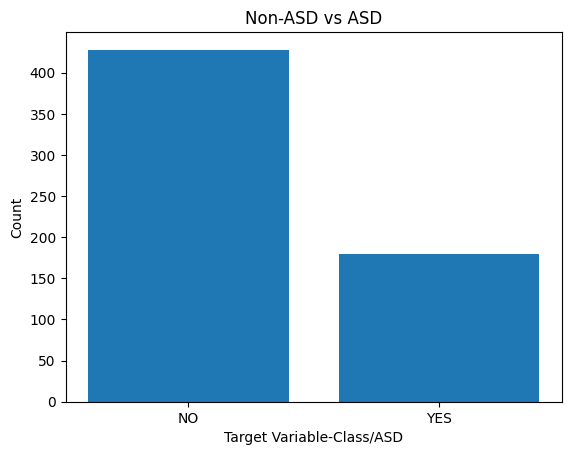

In [129]:
# Since this is a binary classification problem, checking the ratio of dataset imbalance is necessary.
# Counting the occurrences of each class
class_counts = ds1['Class/ASD'].value_counts()

# Creating the bar plot
plt.bar(class_counts.index, class_counts.values)

# Adding labels and title
plt.xlabel('Target Variable-Class/ASD')
plt.ylabel('Count')
plt.title('Non-ASD vs ASD')

# Displaying the plot
plt.show()

**Observation:**

The dataset is highly imbalanced. We will have to balance the dataset before training the model for accurate predictions

**Country of residence Analysis**

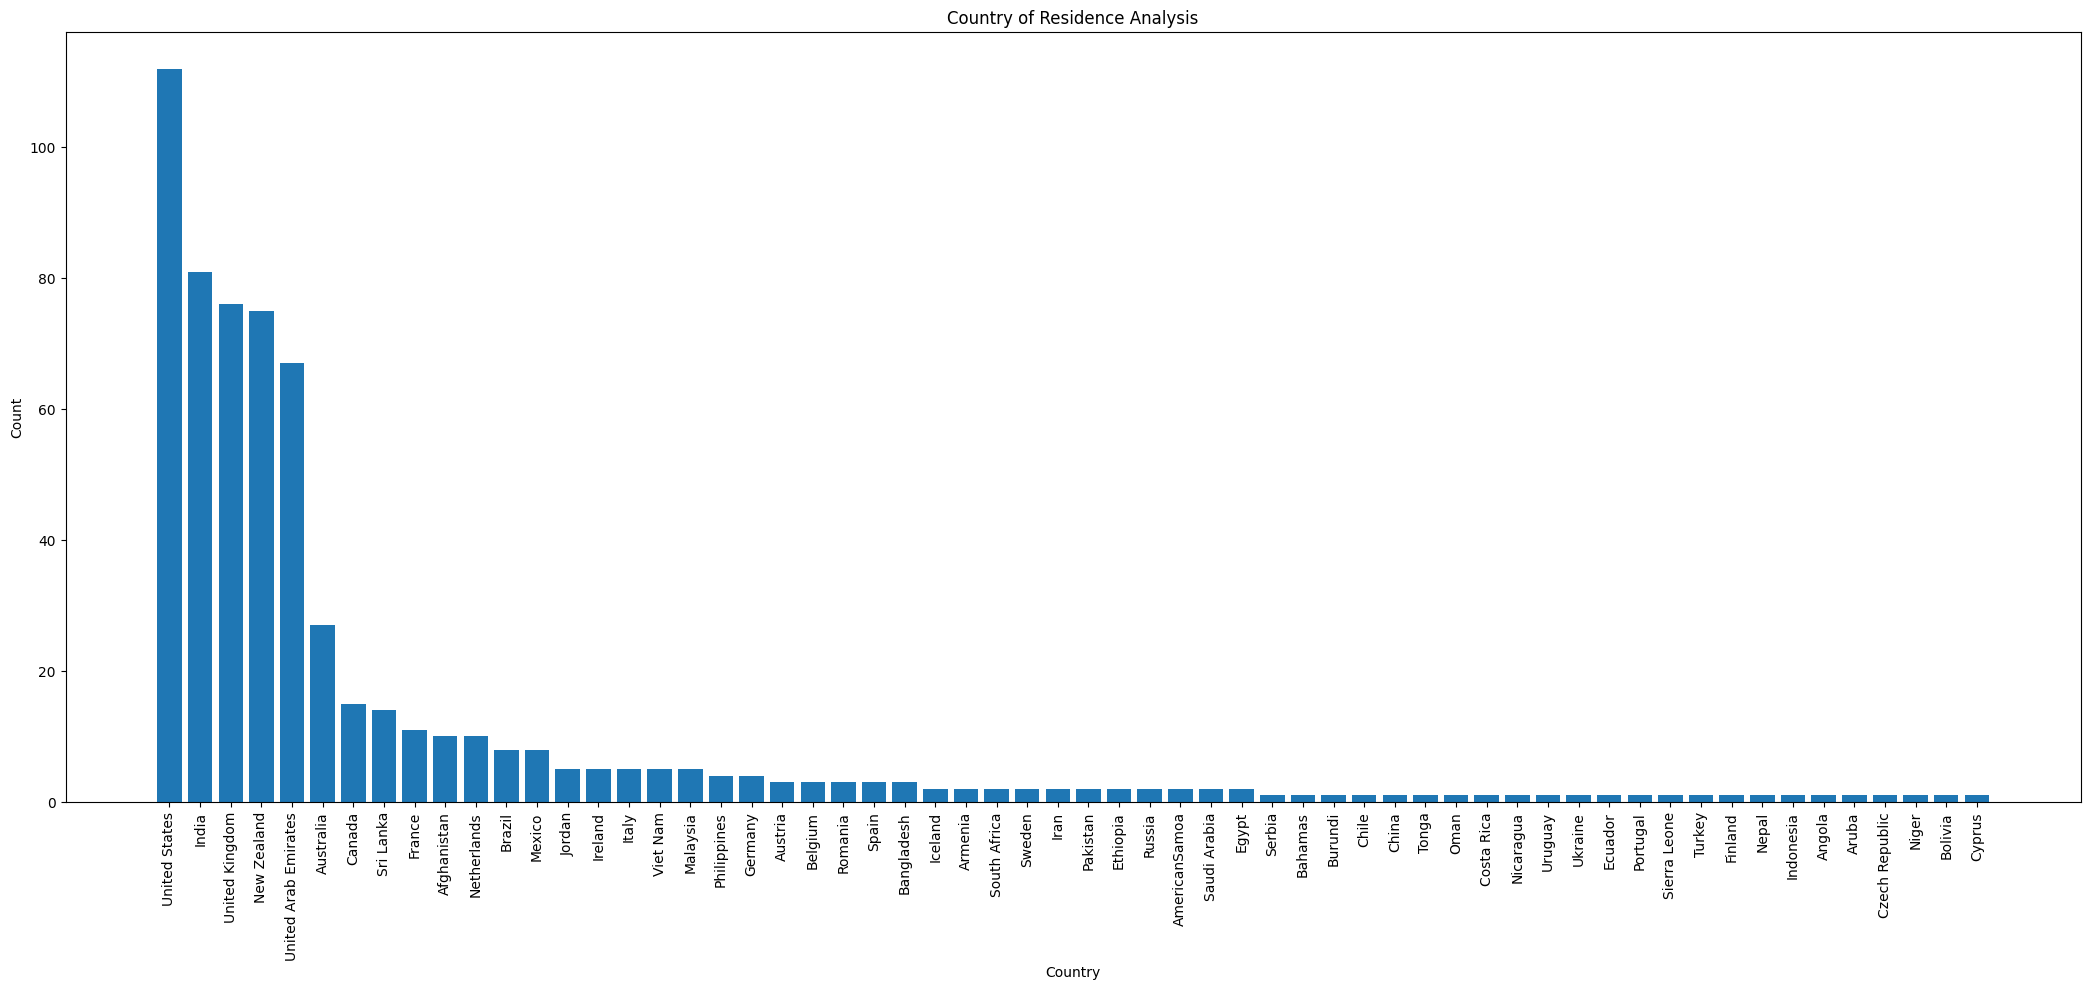

In [130]:
country_counts = ds1['contry_of_res'].value_counts()

# Sort the counts in descending order
country_counts_sorted = country_counts.sort_values(ascending=False)

plt.figure(figsize=(26, 10))
# Plot the bar plot
plt.bar(country_counts_sorted.index, country_counts_sorted.values)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country of Residence Analysis')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Adjust the layout to prevent label overlapping
#plt.tight_layout()

# Display the plot
plt.show()

Observations:
Highest number of test takers belong to countries  United States , India  , United Kingdom , Newzeland , UAE and Australia. Out of the 608 entries , more than half of the test takers belong to these countries.


***Visualizing Ethnicity, Relation and Age_desc of the test takers***

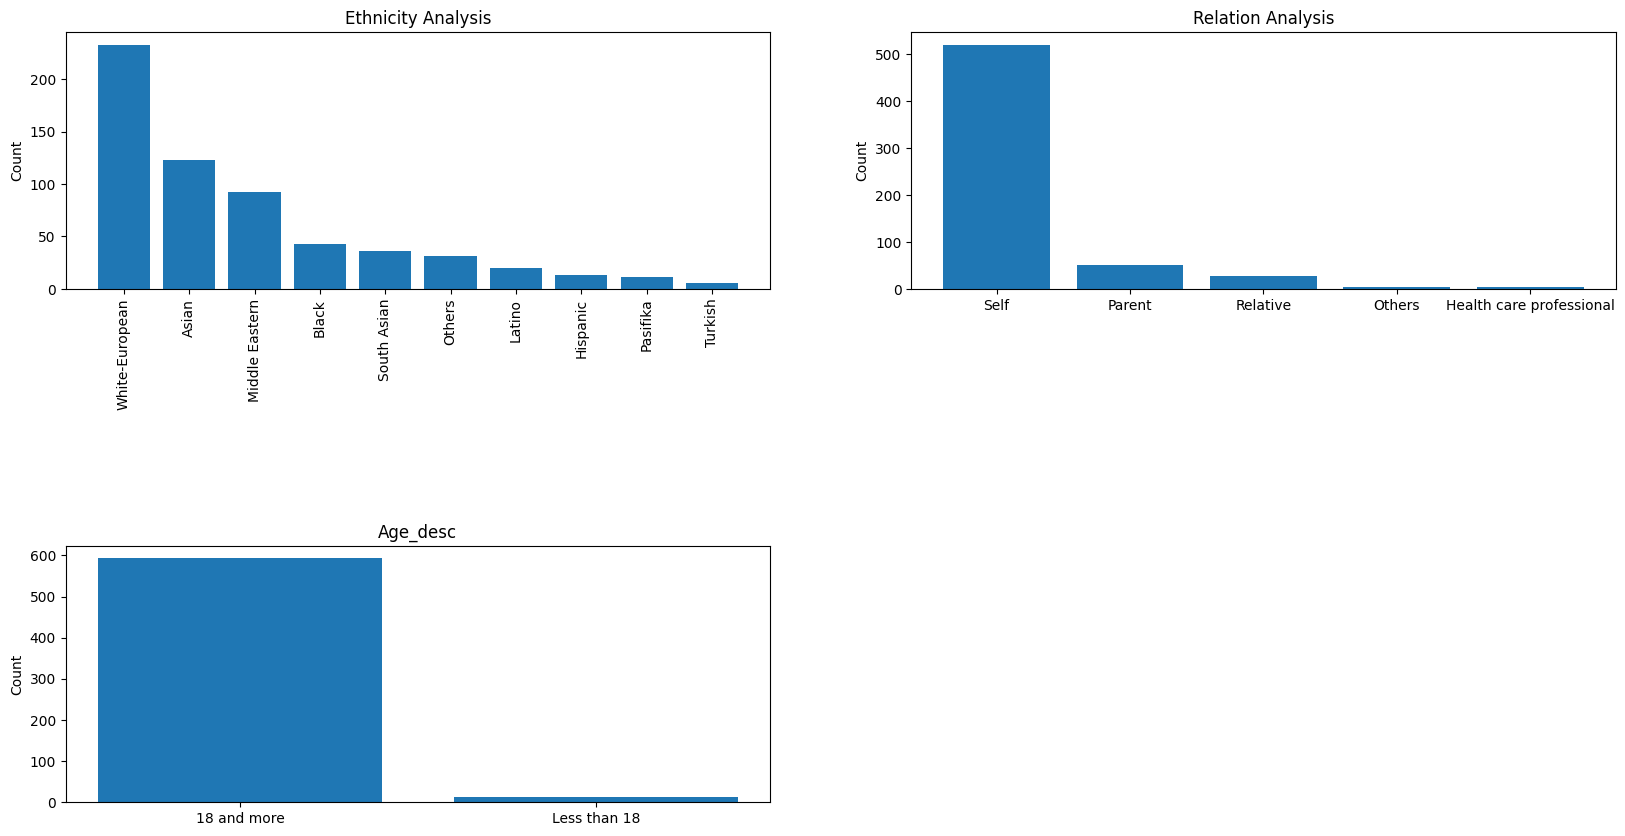

In [131]:
ethnicity_counts = ds1['ethnicity'].value_counts()
relation_counts = ds1['relation'].value_counts()
age_desc_counts = ds1['age_desc'].value_counts()

plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
#This will create the bar graph for ethnicity
plt.bar(ethnicity_counts.index, ethnicity_counts.values)

plt.ylabel('Count')
plt.title('Ethnicity Analysis')
plt.xticks(rotation=90)

#The below code will create the second plot.
plt.subplot(2,2,2)
#This will create the bar graph for relation
plt.bar(relation_counts.index, relation_counts.values)

plt.ylabel('Count')
plt.title('Relation Analysis')

plt.subplot(2,2,3)
#This will create the bar graph for age_desc
plt.bar(age_desc_counts.index, age_desc_counts.values)

plt.ylabel('Count')
plt.title('Age_desc')

plt.subplots_adjust(hspace=1)

plt.show()


Observations:

-> Most of the test takers belong to 'White-European', 'Asian' and 'Middle Eastern' ethnicities

-> The test was taken independently by the majority of test-takers, accounting for more than 500 individuals. Almost 50 individulas received assistance from a parent during the test. Very few individulas have taken assistance from relatives and others.


***Visulaizing the binary categorical variables***

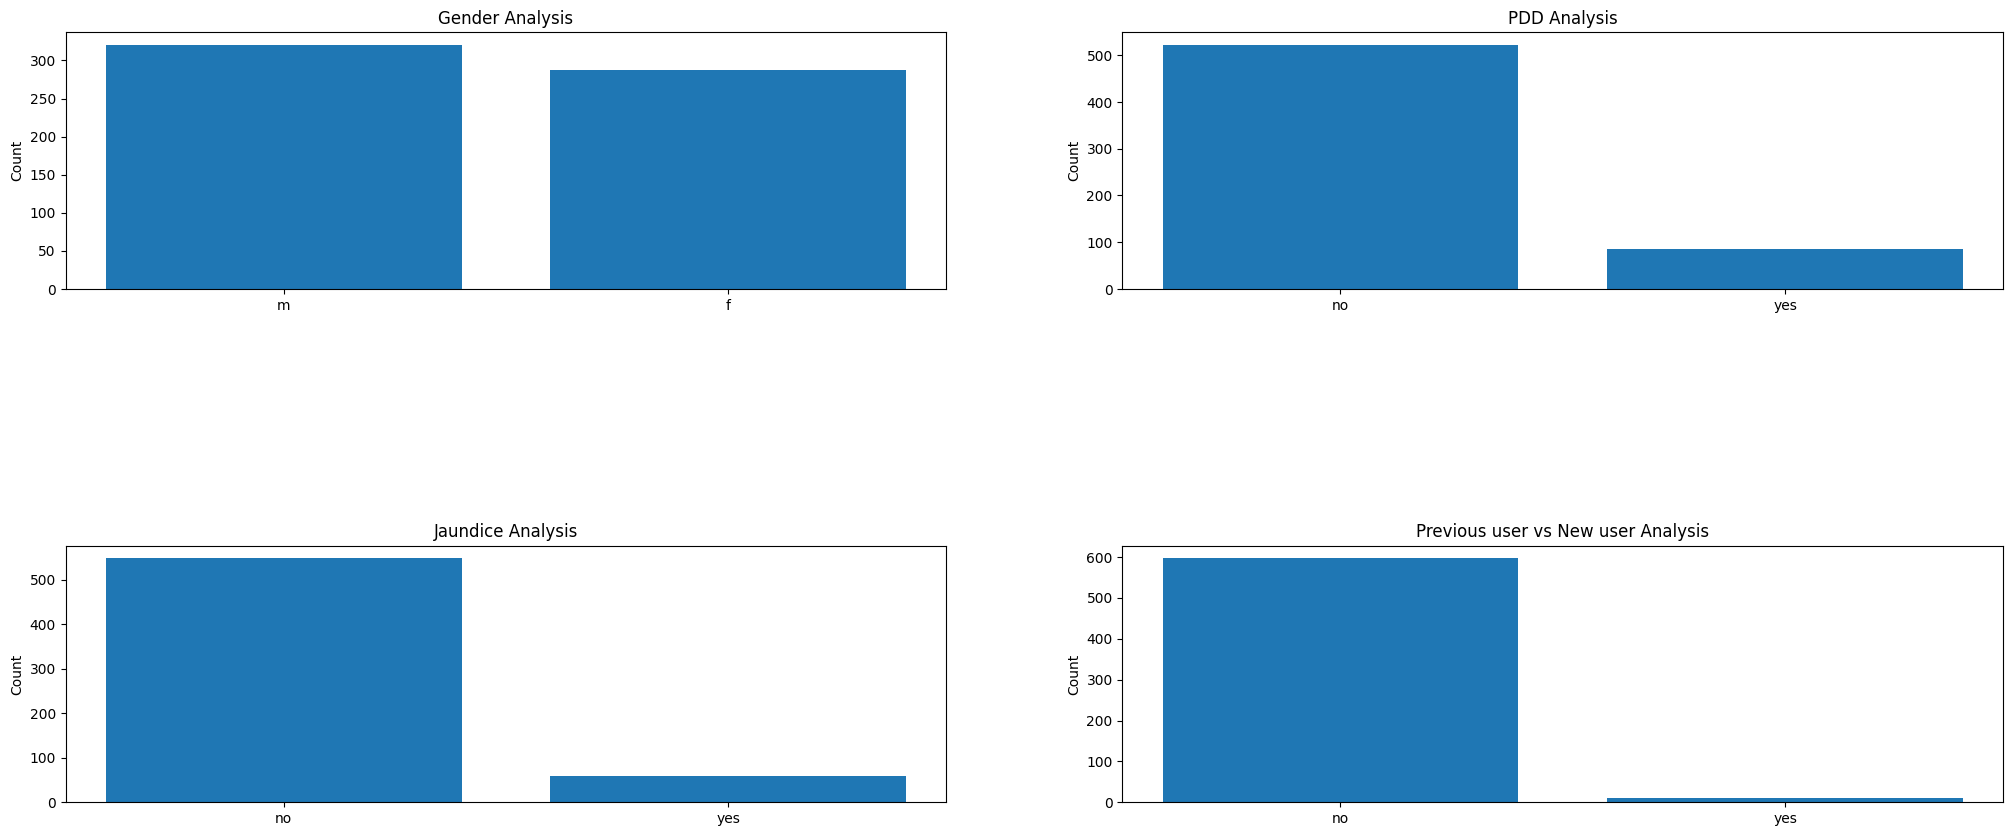

In [132]:
gender_counts = ds1['gender'].value_counts()
pdd_counts = ds1['austim'].value_counts()
jaundice_counts = ds1['jundice'].value_counts()
previous_user_counts = ds1['used_app_before'].value_counts()

plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
plt.bar(gender_counts.index, gender_counts.values)
plt.ylabel('Count')
plt.title('Gender Analysis')

plt.subplot(2,2,2)
plt.bar(pdd_counts.index, pdd_counts.values)
plt.ylabel('Count')
plt.title('PDD Analysis')

plt.subplot(2,2,3)
plt.bar(jaundice_counts.index, jaundice_counts.values)
plt.ylabel('Count')
plt.title('Jaundice Analysis')

plt.subplot(2,2,4)
plt.bar(previous_user_counts.index, previous_user_counts.values)
plt.ylabel('Count')
plt.title('Previous user vs New user Analysis')

plt.subplots_adjust(hspace=1)

plt.show()


Observations:

-> The count of males and females among the test takers does not show any significant difference.

-> Among the test takers, there is a very small proportion of individuals who have Pervasive Development Disorder, jaundice, and previous app usage.


***Analyzing cateogrical variables against the target variable "Class/ASD"***

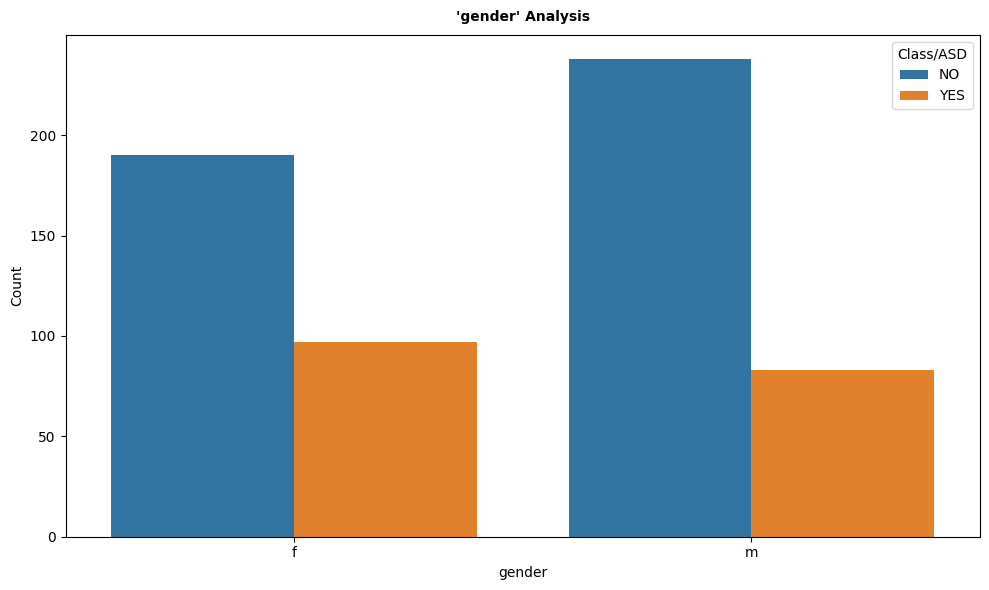

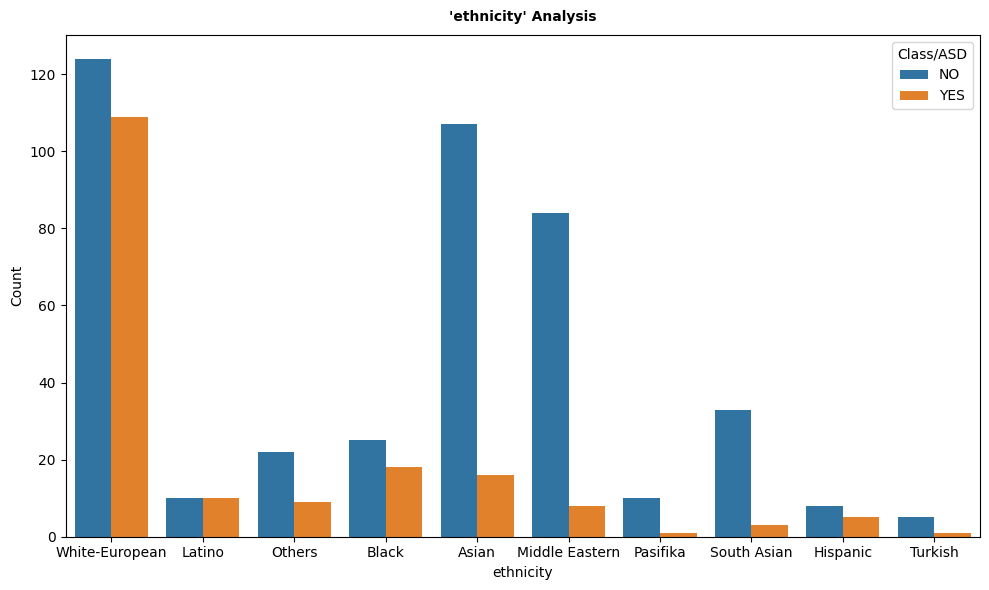

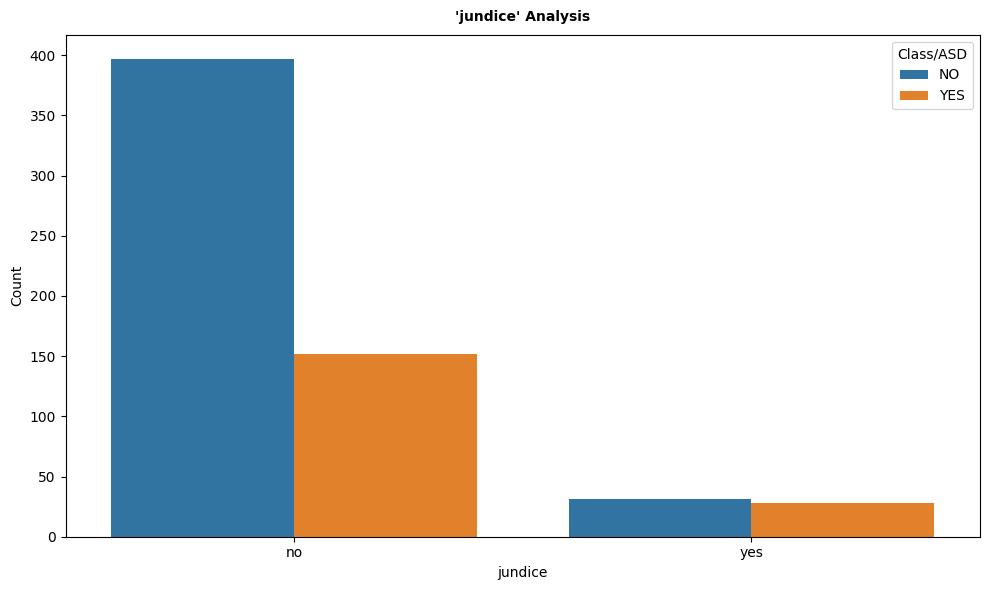

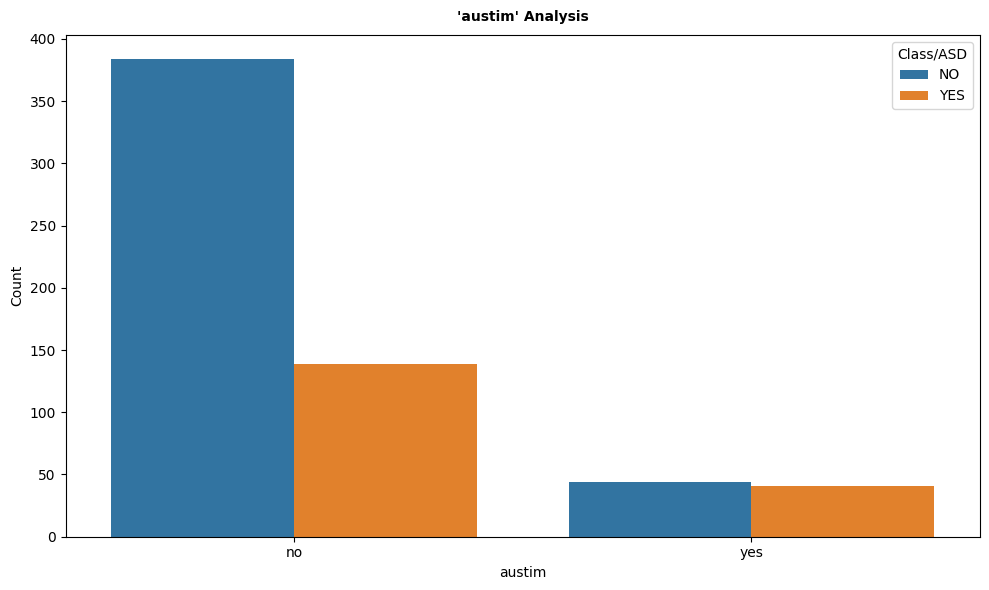

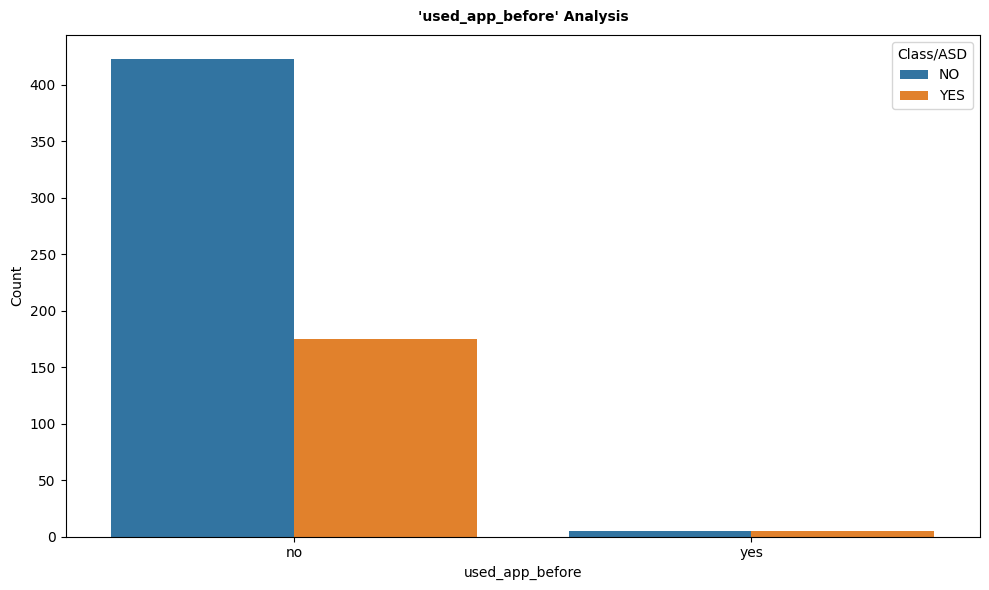

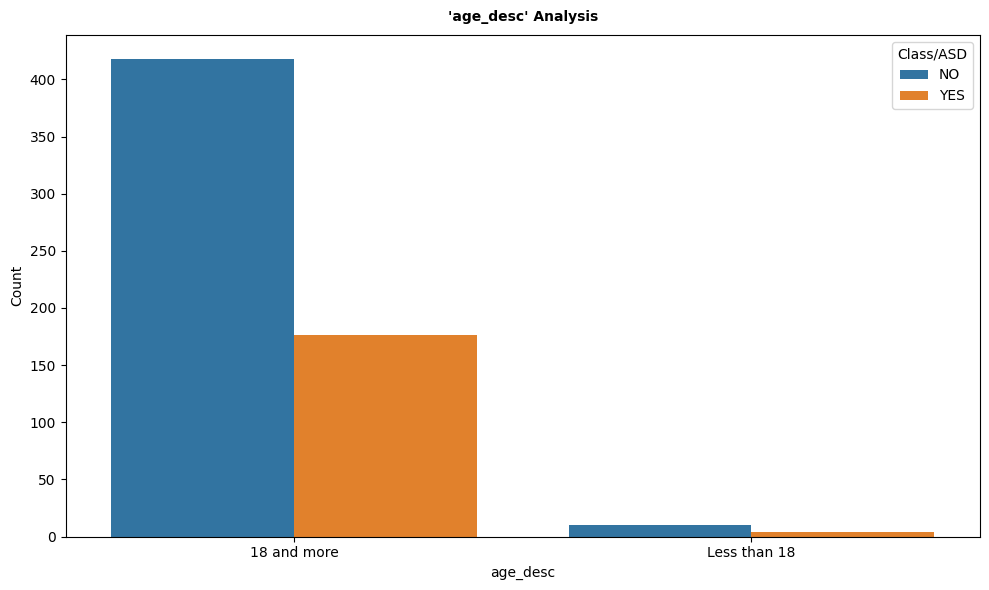

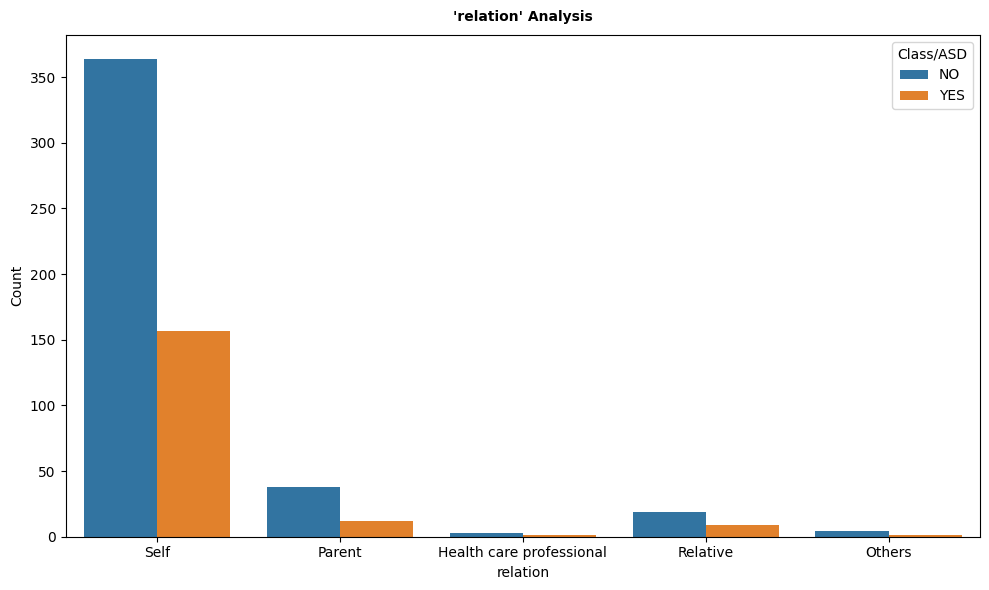

In [133]:
cat_features = [i for i in (ds1.select_dtypes([object]).columns.to_list())if i!="Class/ASD" and i!="contry_of_res"]
target_col="Class/ASD"
for cat_feature in cat_features:
            plt.figure(figsize=(10,6))
            df= ds1[[cat_feature,target_col]]
            sns.countplot(x = cat_feature, hue = target_col,data = df)
            plt.title(f"'{cat_feature}' Analysis", fontweight='bold',fontsize=10, pad=10)
            plt.xlabel(cat_feature)
            plt.ylabel(f"Count")
            plt.tight_layout()
            plt.show()

Observations:

-> Due to the highly imbalanced distribution of samples across classes within the 'Relation', 'Used_app_before', 'Gender', and 'Age_desc' features, no meaningful conclusions can be drawn from these features.

-> There are more chances of a patient having ASD status if born with Jaundice or have a history of Pervasive development disorder(austim attribute)

-> The occurrence of Autism Spectrum Disorder (ASD) is lower among Asians compared to white Europeans ,where the ratio of test takers with ASD to Non-ASD is high

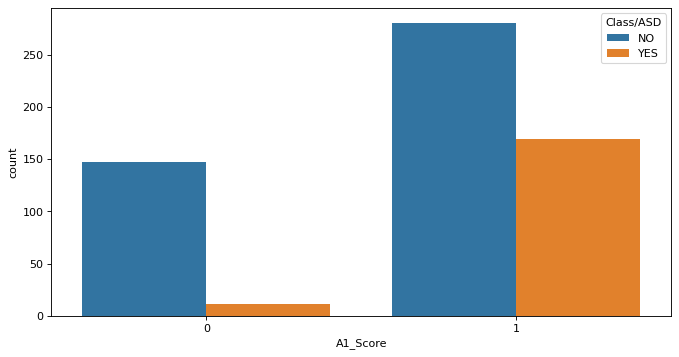

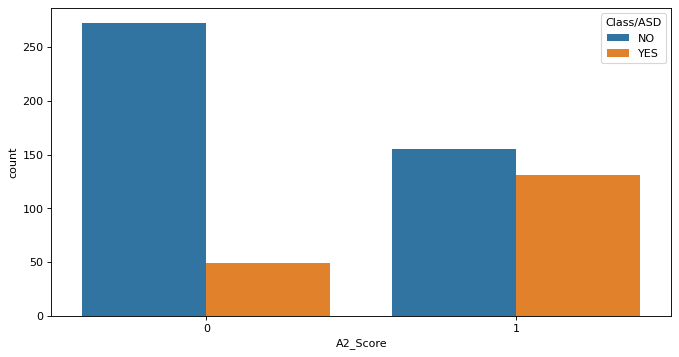

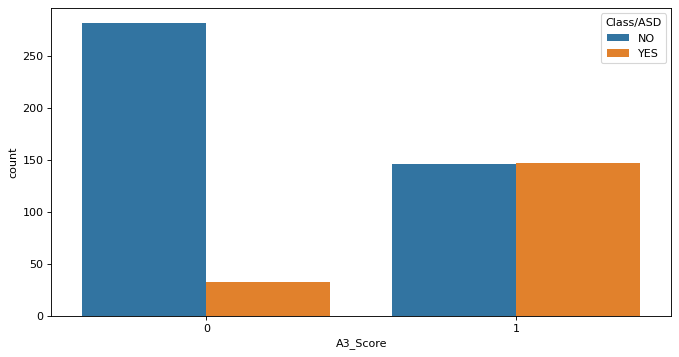

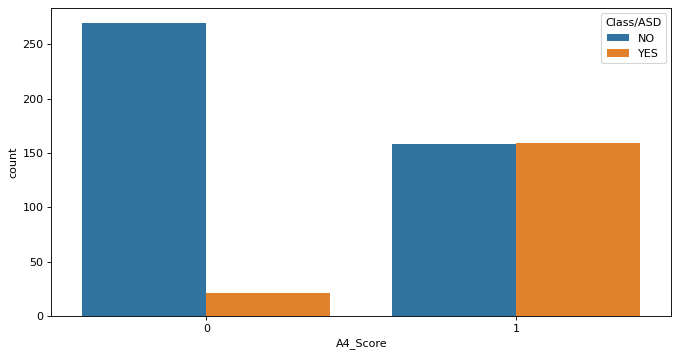

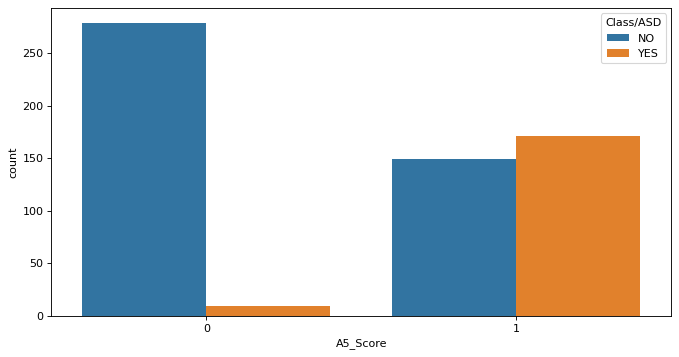

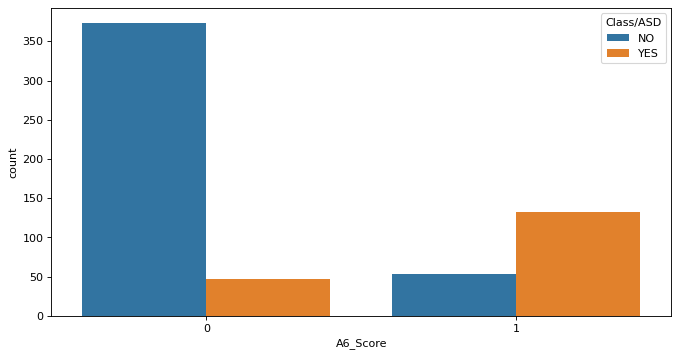

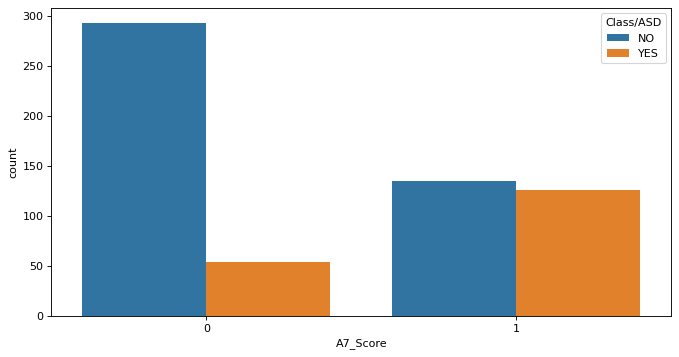

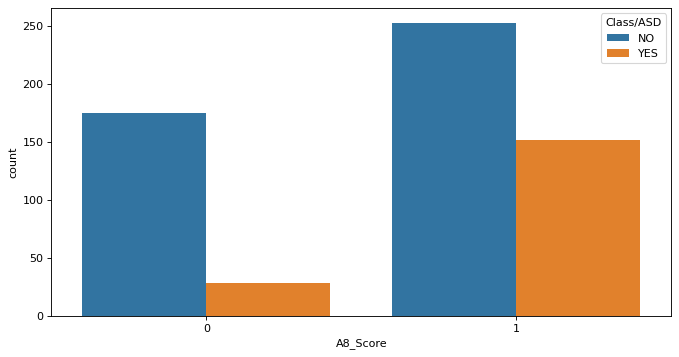

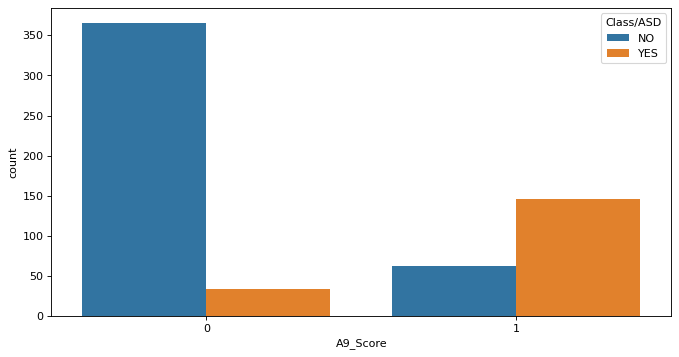

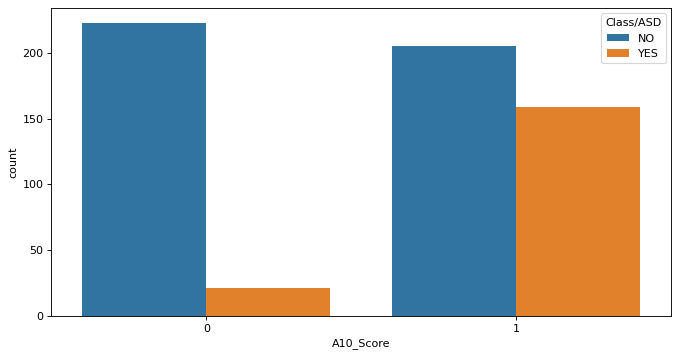

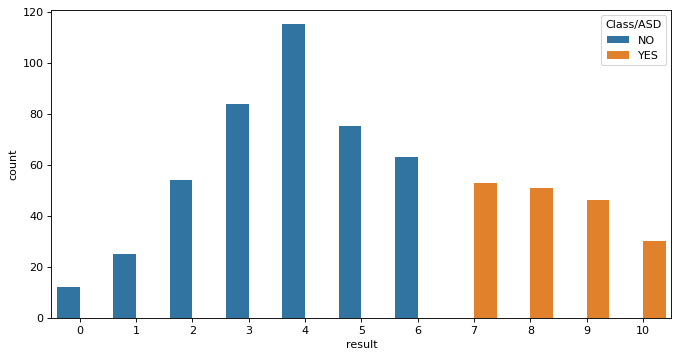

In [134]:
numeric_features = ds1.select_dtypes([int]).columns.to_list()
for num_feature in numeric_features:
            plt.figure(figsize=(10,5),dpi=80)
            ax = sns.countplot(data=ds1, x=num_feature, hue="Class/ASD")
            ax.set_xlabel(ax.get_xlabel(), fontdict={'size': 10})
            ax.set_ylabel(ax.get_ylabel(), fontdict={'size': 10})
            plt.show()


**Observations:**

->The majority of individuals who responded with 1 to the A_Score test of 10 questions had a high likelihood of being identified as potential candidates
 with Autism Spectrum Disorder.

->Among the test-takers diagnosed with ASD, a significant number fell within the age groups of 18-22, 27-30, and 33-38 years.

->Test-takers who obtained a final screening score of 7-10 can be confidently categorized as having ASD.

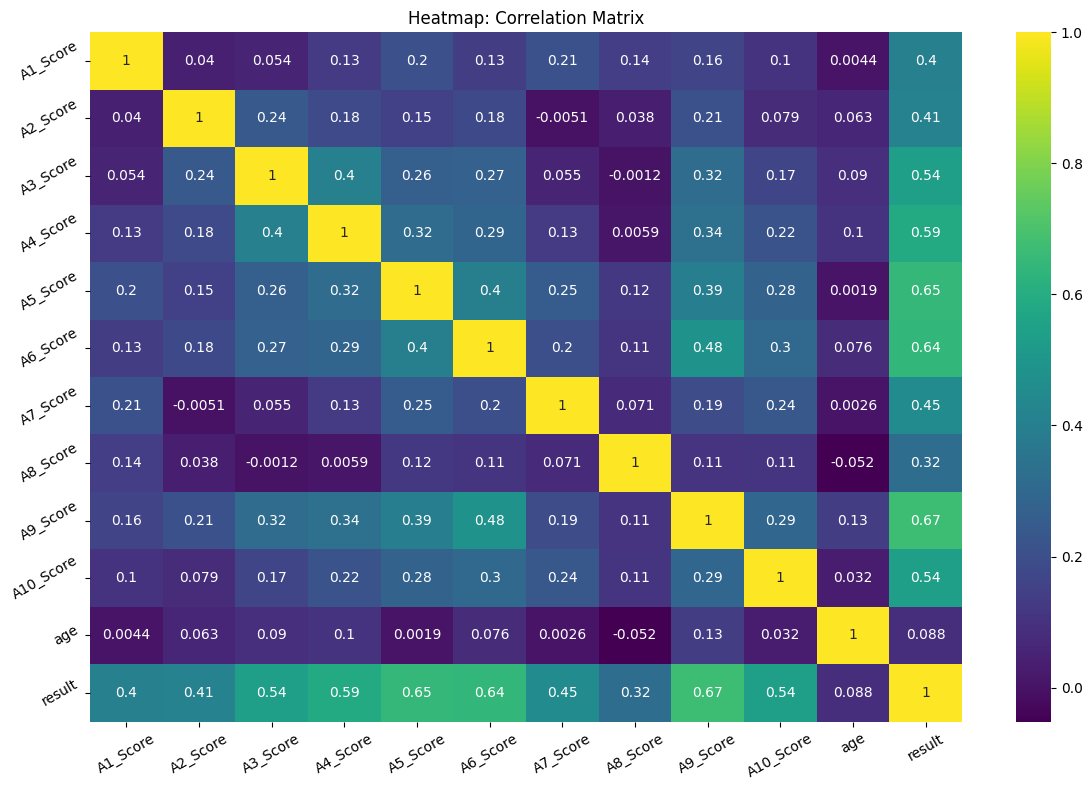

In [135]:
#correlation matrix
corr_matrix = ds1.corr(numeric_only=True)

plt.figure(figsize=(12, 8))

#heatmap
ax = sns.heatmap(corr_matrix, cmap='viridis',annot=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

ax.set_title("Heatmap: Correlation Matrix")

plt.tight_layout()
plt.show()

Observation:

There is a strong correlation between the independent variables A1 to A10 scores and the dependent variable 'Result'.

Since this high correlation can cause issues in the interpretation of the regression coefficients , dropping the 'result' attribute.

In [136]:
ds1 = ds1.drop(["result"], axis=1)

In [137]:
ds1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,3.258097,f,White-European,no,no,United States,no,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,3.178054,m,Latino,no,yes,Brazil,no,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,3.295837,m,Latino,yes,yes,Spain,no,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,3.555348,f,White-European,no,yes,United States,no,18 and more,Self,NO
5,1,1,1,1,1,0,1,1,1,1,3.583519,m,Others,yes,no,United States,no,18 and more,Self,YES


***One-hot Encoding categorical variables***

In [138]:
## Mapping binary values, '0' and '1' to the binary category variables

ds1['gender'] = ds1['gender'].map({'m': 1, 'f': 0})
ds1['jundice'] = ds1['jundice'].map({'yes': 1, 'no': 0})
ds1['austim'] = ds1['austim'].map({'yes': 1, 'no': 0})
ds1['used_app_before'] = ds1['used_app_before'].map({'yes': 1, 'no': 0})
ds1['age_desc'] = ds1['age_desc'].map({'18 and more': 1, 'Less than 18': 0})
ds1['Class/ASD'] = ds1['Class/ASD'].map({'YES': 1, 'NO': 0})

# Using 'get_dummies' for remaining object dtype variables
ds1 = pd.get_dummies(ds1, drop_first=False)

# Check the final preprocessed dataset
ds1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,age_desc,Class/ASD,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_White-European,contry_of_res_Afghanistan,contry_of_res_AmericanSamoa,contry_of_res_Angola,contry_of_res_Armenia,contry_of_res_Aruba,contry_of_res_Australia,contry_of_res_Austria,contry_of_res_Bahamas,contry_of_res_Bangladesh,contry_of_res_Belgium,contry_of_res_Bolivia,contry_of_res_Brazil,contry_of_res_Burundi,contry_of_res_Canada,contry_of_res_Chile,contry_of_res_China,contry_of_res_Costa Rica,contry_of_res_Cyprus,contry_of_res_Czech Republic,contry_of_res_Ecuador,contry_of_res_Egypt,contry_of_res_Ethiopia,contry_of_res_Finland,contry_of_res_France,contry_of_res_Germany,contry_of_res_Iceland,contry_of_res_India,contry_of_res_Indonesia,contry_of_res_Iran,contry_of_res_Ireland,contry_of_res_Italy,contry_of_res_Jordan,contry_of_res_Malaysia,contry_of_res_Mexico,contry_of_res_Nepal,contry_of_res_Netherlands,contry_of_res_New Zealand,contry_of_res_Nicaragua,contry_of_res_Niger,contry_of_res_Oman,contry_of_res_Pakistan,contry_of_res_Philippines,contry_of_res_Portugal,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Saudi Arabia,contry_of_res_Serbia,contry_of_res_Sierra Leone,contry_of_res_South Africa,contry_of_res_Spain,contry_of_res_Sri Lanka,contry_of_res_Sweden,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,1,1,1,1,0,0,1,1,0,0,3.258097,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,1,0,1,3.178054,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,0,1,1,0,1,1,1,1,3.295837,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,1,1,0,1,3.555348,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,1,1,1,1,1,0,1,1,1,1,3.583519,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


***Data Splitting***

In [139]:
## Splitting the dataset into train and test sets
df_train, df_test = train_test_split(ds1, test_size = 0.2, random_state=0)

In [140]:
#X_train, X_test, y_train, y_test = train_test_split(ds1, ds1[target_col], test_size = 0.2, random_state=10)

***Data Scaling***

In [141]:
# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the binary mapped or 'dummy' (one-hot encoded) variables
num_variables = ["age"]

# scaler 'fit_transform' on train data
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

# scaler 'transform' on test datasets
df_test[num_variables] = scaler.transform(df_test[num_variables])

In [142]:
# Splitting individual components of train and test datasets

# Train Data -  True Labels and Features
Y_train = df_train.pop("Class/ASD")
X_train = df_train

# Validation Data - True Labels and Features
Y_test = df_test.pop("Class/ASD")
X_test = df_test

In [143]:
evaluation_results = pd.DataFrame(columns=['Model', 'Cross-Validation Accuracy', 'Test Accuracy','ROC_AUC_Test', 'Precision', 'Recall', 'F1 Score'])

Model Selection

1. Logistic Regression Model
2. Random Forest Classifier Model
3. XGBoost Classifier Model

K-Fold cross-validation is required to ensure that overfitting does not occur

Model Training and Evaluation

LogisticRegression : 
Fold 1: Accuracy = 0.9897959183673469
Fold 2: Accuracy = 0.9896907216494846
Fold 3: Accuracy = 0.9690721649484536
Fold 4: Accuracy = 0.9690721649484536
Fold 5: Accuracy = 1.0
Cross-Validation Mean Accuracy: 0.9835261939827479


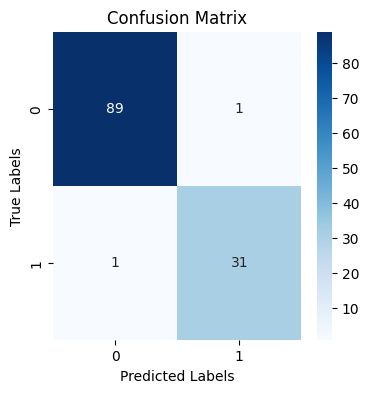

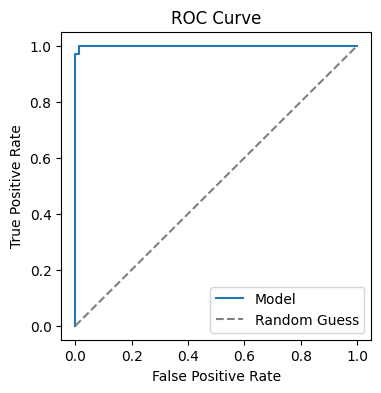

XGBClassifier : 
Fold 1: Accuracy = 0.9795918367346939
Fold 2: Accuracy = 0.9690721649484536
Fold 3: Accuracy = 0.9587628865979382
Fold 4: Accuracy = 0.9690721649484536
Fold 5: Accuracy = 0.9896907216494846
Cross-Validation Mean Accuracy: 0.9732379549758047


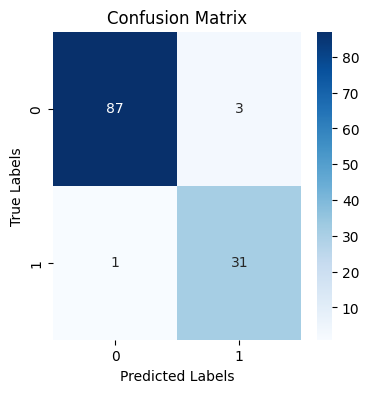

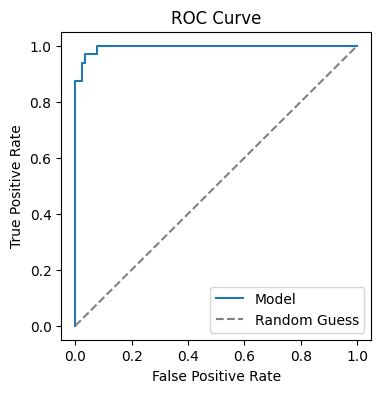

RandomForestClassifier : 
Fold 1: Accuracy = 0.9591836734693877
Fold 2: Accuracy = 0.9484536082474226
Fold 3: Accuracy = 0.9484536082474226
Fold 4: Accuracy = 0.9381443298969072
Fold 5: Accuracy = 0.9587628865979382
Cross-Validation Mean Accuracy: 0.9505996212918157


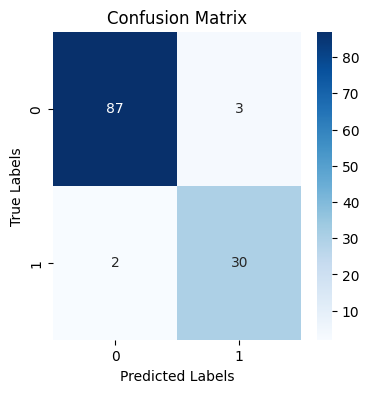

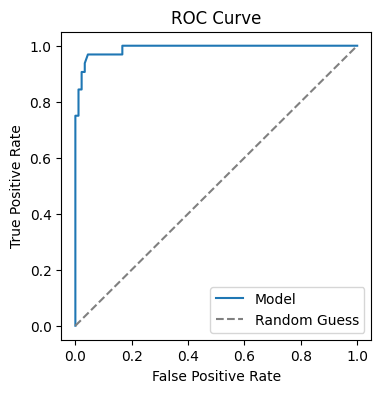

In [144]:
models = [LogisticRegression(), XGBClassifier(), RandomForestClassifier()]

for model in models:

  k = 5  # Number of folds
  scores = cross_val_score(model, X_train, Y_train, cv=k)

  model.fit(X_train, Y_train)

  print(f'{model.__class__.__name__} : ')

  for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: Accuracy = {score}")

  mean_accuracy = scores.mean()
  print(f"Cross-Validation Mean Accuracy: {mean_accuracy}")

  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  # Calculating evaluation metrics
  test_accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred_proba)

  # Plotting the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(4, 4))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

  # Plotting the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.figure(figsize=(4, 4))
  plt.plot(fpr, tpr, label='Model')
  plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

  res= pd.DataFrame({'Model': [model.__class__.__name__],'Cross-Validation Accuracy': [mean_accuracy],
                                        'Test Accuracy': [test_accuracy],
                                        'ROC_AUC_Test': [roc_auc],
                                        'Precision': [precision],'Recall': [recall],
                                        'F1 Score':[f1]})


  evaluation_results = pd.concat([evaluation_results, res], ignore_index=True)


In [145]:
evaluation_results

,Model,Cross-Validation Accuracy,Test Accuracy,ROC_AUC_Test,Precision,Recall,F1 Score
0,LogisticRegression,0.983526,0.983607,0.999653,0.968750,0.96875,0.968750
1,XGBClassifier,0.973238,0.967213,0.995139,0.911765,0.96875,0.939394
2,RandomForestClassifier,0.950600,0.959016,0.990104,0.909091,0.93750,0.923077


Conclusion

After training and evaluating multiple classifiers using the K-fold technique on the dataset, we have gained insights on their performances.

Logistic Regression  demonstrated the highest accuracy of 98%, outperforming the other classifiers.When evaluated on the test set, it also achieved a remarkable accuracy of 98%.

The consistent accuracies achieved by all three classifiers in both cross-validation and test cases indicate their ability to generalize well.



